In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy. stats import zscore

In [21]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Fixed the typo 'scale'
outliers = np.array([12,32,200,132])  # Fixed the outliers definition
data = np.concatenate([data, outliers]) 

In [22]:
df = pd.DataFrame(data, columns=['Values'])
print (df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


scatter plot

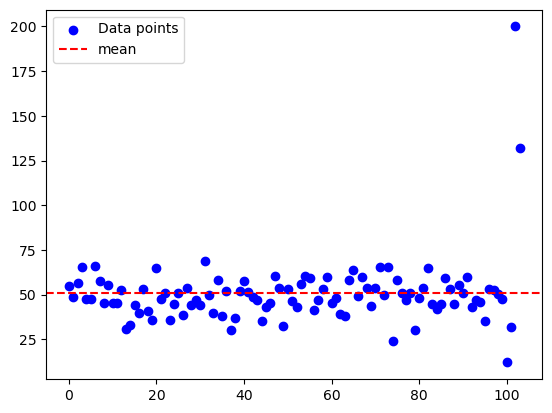

In [23]:
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='mean')
plt.legend()
plt.show()

box plot

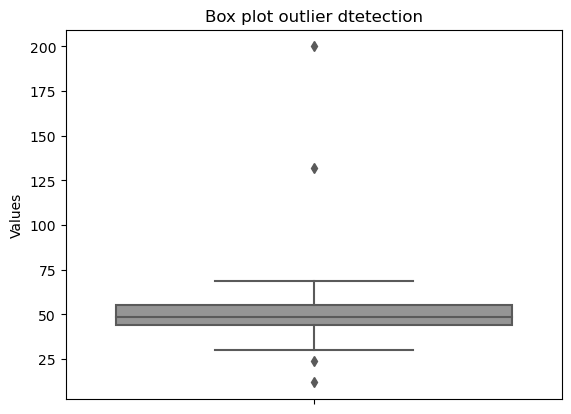

In [45]:
sns.boxplot(data=df,y='Values',palette='Greys')
plt.title("Box plot outlier dtetection")
plt.show()

Z-Score Method

The Z-score formula is:

where:

X = Data point

p = Mean of the dataset

o Standard deviation of the dataset

Steps:

I.Compute the Z-score for each data point. 2.1f Z-score -> 3 or Z-score < -3, mark it as an outlier.


In [49]:
df['zscore']=zscore(df['Values'])
df['outliers']=df['zscore'].apply(lambda x:'Outlier' if abs(x)>3 else 'Normal')
print(df[df['outliers']=='Outlier'])

     Values    zscore outliers
102   200.0  7.688975  Outlier
103   132.0  4.187109  Outlier


# Interquartile Range (IQR) Method The IQR formula is:

IQR Q3 - QI
Steps:
1 .Calculate QI (25th percentile) and Q3 (75th percentile).

2.Compute IQR Q3 - Q1.

3.Define lower & upper bounds:

lower_bound=Q1-1.5*IQR

upper Bound=Q3+1.5*1QR

4.Any value outside these bounds is an outlier,Lower Bound=Q1-i.5x1QR



In [52]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['outlier-iqr']=df['Values'].apply(lambda x:'Outlier' if(x<lower_bound or x>upper_bound) else 'Normal')
print(df)


         Values    zscore outliers outlier-iqr
0     54.967142  0.220069   Normal      Normal
1     48.617357 -0.106932   Normal      Normal
2     56.476885  0.297818   Normal      Normal
3     65.230299  0.748602   Normal      Normal
4     47.658466 -0.156313   Normal      Normal
..          ...       ...      ...         ...
99    47.654129 -0.156536   Normal      Normal
100   12.000000 -1.992653   Normal     Outlier
101   32.000000 -0.962693   Normal      Normal
102  200.000000  7.688975  Outlier     Outlier
103  132.000000  4.187109  Outlier     Outlier

[104 rows x 4 columns]


# Final Summary

1 .Scatter Plot Outliers appear far from the main cluster.

2.Box Plot -• Outliers are outside the whiskers.

3.Z-Score Values with Z > 3 or Z < -3 are outliers.

4.1QR Method Values outside [QI - 1.5xIQR, Q3 + 1.5xIQR] are outliers.




# Finding Outliers Using the IQR Method with a 5-Number Summary The 5-number summary consists of:

Minimum (QO) The smallest value in the dataset.

First Quartile (QI) -9 The 25th percentile (lower quartile).

Median (Q2) —• The 50th percentile (middle value).

Third Quartile (Q3) The 75th percentile (upper quartile).

Maximum (Q4) The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:

IQR=Q3-Q1

Any value outside the range:

[QI -1.5x IQR,Q3+1.5x IQR] is considered an outlier.

In [55]:
# Step 1: Create data
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution (mean=50, std=10)
outliers = np.array([5, 120])  #outliers
data = np.concatenate([data, outliers])  # Merge normal data with outliers

# Step 2: Compute the 5-number summary
Q1 = np.percentile(data, 25)  # First Quartile (25th percentile)
Q2 = np.median(data)          # Median (50th percentile)
Q3 = np.percentile(data, 75)  # Third Quartile (75th percentile)
min_value = np.min(data)      # Minimum value
max_value = np.max(data)      # Maximum value

# Step 3: Compute IQR 
IQR = Q3 - Q1

# Step 4: Compute Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Find Outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Step 6: Print Results
print(f"5-Number Summary: \nMin: {min_value}, Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")


5-Number Summary: 
Min: 5.0, Q1: 43.98560368348251, Median (Q2): 48.73043708220287, Q3: 54.664601193448426, Max: 120.0
IQR: 10.678997509965917
Lower Bound: 27.967107418533633, Upper Bound: 70.6830974583973
Outliers: [ 23.80254896   5.         120.        ]


In [56]:
import pandas as pd
from sklearn.utils import resample

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4200, 4300, 4500, 5000, 5500, 6000, 6500],
    'Class': ['Low', 'Low', 'Low', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'High']
})






In [57]:
# Separate majority and minority classes
df_high = df[df['Class'] == 'High']
df_low = df[df['Class'] == 'Low']

# Downsample majority class ('High' in this case)
df_high_downsampled = resample(df_high, replace=False,n_samples=len(df_low),random_state=42)  

In [59]:
# Combine downsampled majority class with minority class
df_balanced = pd.concat([df_high_downsampled, df_low])

# Print the balanced dataset
print(df_balanced.value_counts())

Age  Income  Class
22   2000    Low      1
25   2500    Low      1
27   2700    Low      1
28   3200    High     1
30   3500    High     1
35   3800    High     1
40   4200    High     1
45   4300    High     1
50   4500    Low      1
55   5000    Low      1
60   5500    High     1
65   6000    Low      1
Name: count, dtype: int64


In [62]:
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['Minority', 'Minority', 'Minority', 'Majority', 'Majority', 'Majority', 'Majority', 
              'Majority', 'Minority', 'Minority', 'Majority', 'Majority', 'Majority']
})
print(df)

    Age  Income     Class
0    22    2000  Minority
1    25    2500  Minority
2    27    2700  Minority
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Majority
6    40    4000  Majority
7    45    4200  Majority
8    50    4300  Minority
9    55    4500  Minority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Majority


In [63]:
df_majority = df[df['Class'] == 'Majority']
df_minority = df[df['Class'] == 'Minority']

# Upsample the minority class to match the majority class size
df_minority_upsampled = resample(df_minority, replace=True,  n_samples=len(df_majority),random_state=42) 

# Combine the upsampled minority class with the majority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Print the balanced dataset
print(df_balanced)

    Age  Income     Class
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Majority
6    40    4000  Majority
7    45    4200  Majority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Majority
8    50    4300  Minority
9    55    4500  Minority
2    27    2700  Minority
9    55    4500  Minority
9    55    4500  Minority
1    25    2500  Minority
2    27    2700  Minority
2    27    2700  Minority
